In [43]:
#import part
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
color = sns.color_palette()
print(os.listdir("./input"))
path = "./input/"


['train_sample3.csv', 'train.csv', 'train_sample2.csv', 'test.csv', 'train_sample.csv']


In [44]:
train_df = pd.read_csv(path+"train_sample.csv",nrows=10000)
train_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
ip                 10000 non-null int64
app                10000 non-null int64
device             10000 non-null int64
os                 10000 non-null int64
channel            10000 non-null int64
click_time         10000 non-null object
attributed_time    29 non-null object
is_attributed      10000 non-null int64
dtypes: int64(6), object(2)
memory usage: 1.5 MB


total k is  10000
0    0.9971
1    0.0029
Name: is_attributed, dtype: float64


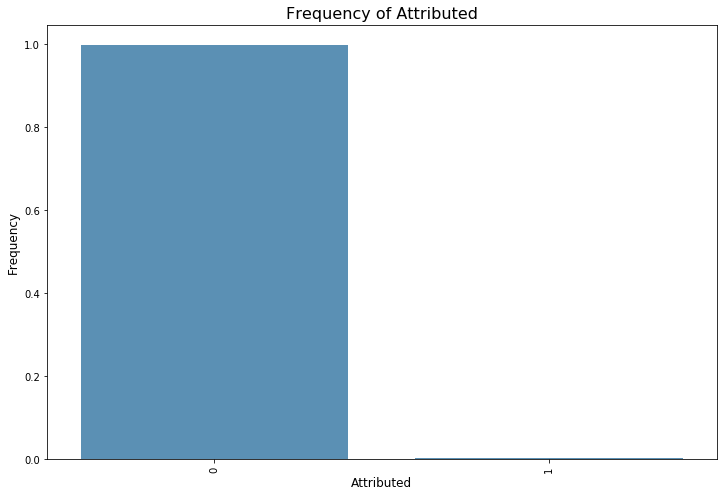

In [45]:
group_df = train_df.is_attributed.value_counts().reset_index()

num = group_df['is_attributed'].sum()
print ("total k is ",k)
plt.figure(figsize = (12,8))
sns.barplot(group_df['index'], (group_df.is_attributed/num), alpha=0.8, color=color[0])
print((group_df.is_attributed/k))
plt.ylabel('Frequency', fontsize = 12)
plt.xlabel('Attributed', fontsize = 12)
plt.title('Frequency of Attributed', fontsize = 16)
plt.xticks(rotation='vertical')
plt.show()


In [71]:

train_df['click_time'] = pd.to_datetime(train_df['click_time'])
train_df['hour'] = train_df['click_time'].dt.hour
train_df['weekday'] = train_df['click_time'].dt.weekday
#train_df=train_df.drop(['click_time'], axis =1)
train_df.info(memory_usage='deep')

#print (train_df.head(10))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 284 to 99562
Data columns (total 9 columns):
ip               227 non-null int64
app              227 non-null int64
device           227 non-null int64
os               227 non-null int64
channel          227 non-null int64
click_time       227 non-null datetime64[ns]
is_attributed    227 non-null int64
hour             227 non-null int64
weekday          227 non-null int64
dtypes: datetime64[ns](1), int64(8)
memory usage: 17.7 KB


In [74]:

df = pd.read_csv(path+'train_sample.csv', iterator=True, chunksize=10000, usecols=['ip','app','device','os', 'channel', 'click_time', 'is_attributed'])
train_df1 = pd.concat([chunk[chunk['is_attributed'] > 0] for chunk in df])


train_df = [train_df1]
train_df = pd.concat(train_df)
train_df.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 284 to 99562
Data columns (total 7 columns):
ip               227 non-null int64
app              227 non-null int64
device           227 non-null int64
os               227 non-null int64
channel          227 non-null int64
click_time       227 non-null object
is_attributed    227 non-null int64
dtypes: int64(6), object(1)
memory usage: 29.3 KB


ValueError: could not convert string to float: '2017-11-08 04:57:34'

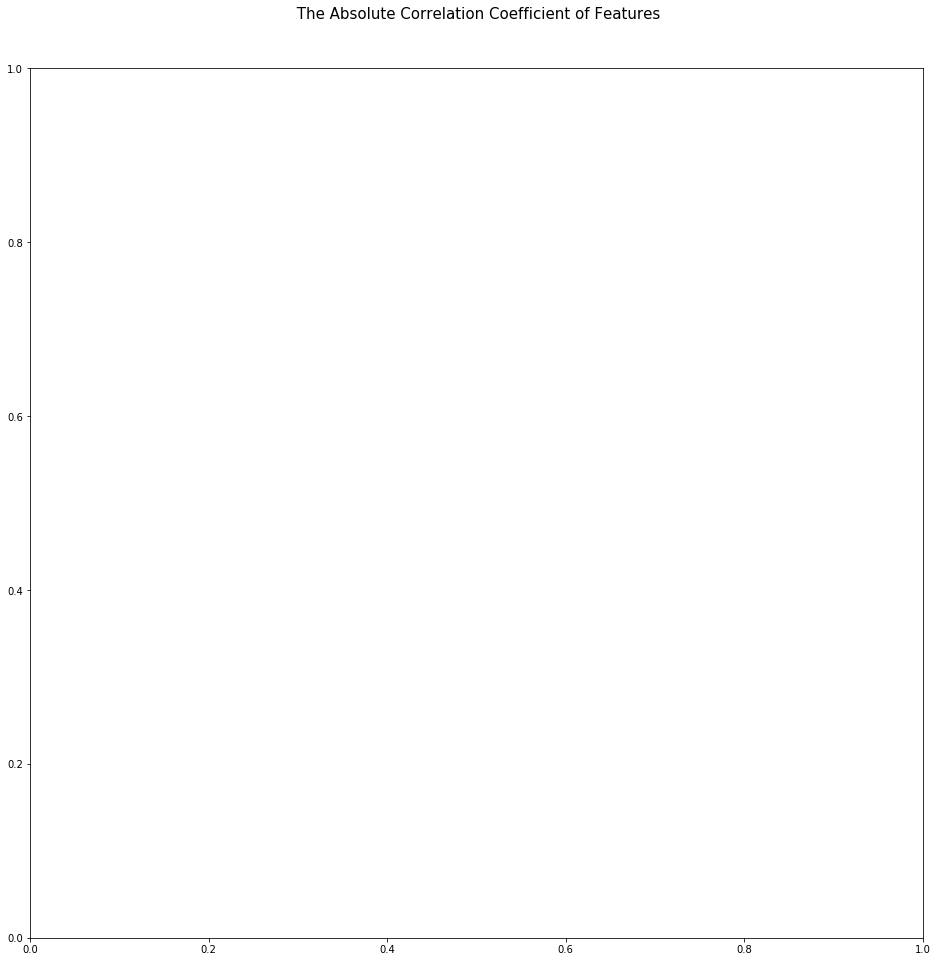

In [76]:
colormap = plt.cm.viridis
plt.figure(figsize=(16,16))
plt.title(' The Absolute Correlation Coefficient of Features', y=1.05, size=15)
sns.heatmap(abs(train_df.astype(float).corr()),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, )
plt.show()
